* 공공데이터분석 중간고사 2023.04.21 (금)

In [1]:
##################################################
############### 문제 풀기 전 주의사항 ##############
##################################################

# 시험시간 내 인터넷 사용 금지, 시험문제 다운로드, 업로드 시에만 가능
# (시험 중, 핸드폰이나 인터넷 사용을 포함한 부정행위 적발시 0점 처리).

# ipynb 시험파일, html 시험파일, 데이터를 다운 받고,
# ipynb 시험 파일은 파일명 수정 -> da금_중간_20181234_홍길동.ipynb.

# html 파일의 실행결과를 참고하여, ipynb 파일의 #=== 코드작성 ===# 부분에 코드를 작성
# (ipynb파일의 실행결과는 코드 작성과정에서 사라질 수 있음).

# 맨 위의 셀을 우선 실행.
# 랜덤 값을 입력으로하는 문제는 주어진 실행결과와 다른 실행결과가 나올 수 있음.
# 문제에 주어진 코드는 수정 불가.

# 코드는 다른 값을 갖는 데이터에서도 동작을 해야만 정답으로 인정
# (문제의 데이터 값 자체를 가지고 결과를 만들면 오답 처리)

# 시험 도중 anaconda prompt (검은창) 지우지 말것.
# 갑자기 컴퓨터에 문제가 생길수 있으니, 시험 중간중간에 파일 저장 (crtl+s) 할 것.

# 시험이 끝나면 실행결과를 모두 확인하고 작성한 ipynb 파일 저장 후,
# 작성한 ipynb을 < 캔버스 --> 과제 --> 중간고사> 에 업로드.


In [2]:
# 사용할 패키지를 import합니다
import sys
print('python', sys.version)

import numpy as np
print('numpy', np.__version__)

import pandas as pd
print('pandas', pd.__version__)

import matplotlib as mpl
print('matplotlib', mpl.__version__)

import matplotlib.pyplot as plt
plt.rc("font", family="Malgun Gothic") # window

import seaborn as sns
print('seaborn', sns.__version__)

# 결과 확인을 용이하게 하기 위한 코드
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# # 경고 메시지는 출력되지 않게 합니다.
# import warnings
# warnings.filterwarnings("ignore")

python 3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]
numpy 1.20.1
pandas 1.2.4
matplotlib 3.3.4
seaborn 0.11.1


# 문제1
* df1의 'a' column이 'y'인 행만 골라서, 결측치를 -1 으로 채운 df1a을 출력하시오

In [3]:
df1=pd.DataFrame({'a':list('yynnynyy'), 'b':[1,2,np.nan,4,np.nan,6,np.nan,8], 'c':[1,2,3,4,5,6,np.nan,np.nan]})
print("## 주어진 데이터")
df1

## 코드 작성 ##
df1a=df1.loc[df1['a']=='y']
df1a=df1a.fillna(-1)
## 코드 작성 끝 ##

print("## 코딩 결과")
df1a

## 주어진 데이터


,a,b,c
0,y,1.0,1.0
1,y,2.0,2.0
2,n,NaN,3.0
3,n,4.0,4.0
4,y,NaN,5.0
5,n,6.0,6.0
6,y,NaN,NaN
7,y,8.0,NaN


## 코딩 결과


,a,b,c
0,y,1.0,1.0
1,y,2.0,2.0
4,y,-1.0,5.0
6,y,-1.0,-1.0
7,y,8.0,-1.0


# 문제2
* df2의 'a' column에서 숫자로만 이루어진 값들의 합을 구하시오

In [4]:
df2=pd.DataFrame({'a':np.random.randint(1,5,size=10).astype(str)})
df2['a']=[df2.loc[x,'a']+'_' if x in [3,4,6,8] else df2.loc[x,'a'] for x in range(10)]
df2.loc[2,'a']=np.nan
df2.loc[7,'a']=np.nan
print("## 주어진 데이터")
df2

## 코드작성
s1=0
for x in df2['a']:
    if x!=x: # not x==np.nan
        continue
    if x.isdigit():
        s1+=int(x)
## 코드작성 끝
print("## 코딩 결과")
s1

## 주어진 데이터


,a
0,2
1,1
2,NaN
3,3_
4,4_
5,1
6,4_
7,NaN
8,2_
9,4


## 코딩 결과


8

# 문제3
* df3의 column p1에 가격이 dollar와 won으로 표시되어있다. column p2를 만들어 새로운 가격을 넣으시오
* 조건1) dollar의 경우 dollar제거후 1000을 곱한 값을, won인 경우 won을 제거한 값을 그대로 넣으시오
* 조건2) dtypes를 확인했을 때 p2 column의 dtype이 int가 되게 하시오

In [5]:
df3=pd.DataFrame({'p1':['1dollar','2dollar','3000won','4dollar','5dollar','6000won','7dollar']})
print("## 주어진 데이터")
df3

 ## 코드작성
def f3(x):
    if 'dollar' in x:
        x2=int(x.replace('dollar',''))*1000
    elif 'won' in x:
        x2=int(x.replace('won',''))
    return x2

df3['p2']=df3['p1'].map(f3)
 ## 코드작성 끝

print("## 코딩 결과")
df3
df3.dtypes

## 주어진 데이터


,p1
0,1dollar
1,2dollar
2,3000won
3,4dollar
4,5dollar
5,6000won
6,7dollar


## 코딩 결과


,p1,p2
0,1dollar,1000
1,2dollar,2000
2,3000won,3000
3,4dollar,4000
4,5dollar,5000
5,6000won,6000
6,7dollar,7000


p1    object
p2     int64
dtype: object

# 문제4
* dataframe df4에서 c1 별 v1 값 중 짝수의 평균을 구하시오
* 조건1) apply를 사용하시오

In [6]:
df4=pd.DataFrame({'c1':list('aaaabbaaabbbabb'), 'v1':[ 3, 12, 13, 7, 6, 9, 10, 2, 1, 14, 0, 4, 5, 8, 11]})
print("## 주어진 데이터")
df4

## 코드작성 ##
def f1(sr1):
    sr2=sr1.loc[sr1%2==0]
    return np.mean(sr2)

sr4a=df4.groupby('c1')['v1'].apply(f1)
## 코드작성 끝 ##

print("## 코딩 결과")
sr4a

## 주어진 데이터


,c1,v1
0,a,3
1,a,12
2,a,13
3,a,7
4,b,6
5,b,9
6,a,10
7,a,2
8,a,1
9,b,14


## 코딩 결과


c1
a    8.0
b    6.4
Name: v1, dtype: float64

# 문제5
* dataframe df_last에서 "전용면적 별" "지역 별" 평당분양가격의 "최대값"을 df5에 담아 출력하시오
* 조건1) groupby를 사용하시오

In [7]:
def get_area_type(x):
    x2=x.replace("전용면적", "").replace("초과", "~").replace("이하", "").replace(" ", "")
    return x2

df_last = pd.read_csv("data/전국평균 분양가격 (2015년10월~2019년12월).csv", encoding="cp949")
df_last["분양가격"] = pd.to_numeric(df_last["분양가격(㎡)"], errors='coerce')
df_last["평당분양가격"] = df_last["분양가격"] * 3.3
df_last["전용면적"] = df_last["규모구분"].map(get_area_type)
df_last=df_last.drop(columns=['규모구분','분양가격(㎡)','분양가격'], errors='ignore') # error raise 방지
df_last=df_last.loc[df_last['평당분양가격'].notnull()]
print("## 주어진 데이터")
df_last

## 코드작성
df5=df_last.groupby(['지역명', '전용면적'])['평당분양가격'].max().unstack()
## 코드작성 끝

print("## 코딩 결과")
df5

## 주어진 데이터


,지역명,연도,월,평당분양가격,전용면적
0,서울,2015,10,19275.3,전체
1,서울,2015,10,18651.6,60㎡
2,서울,2015,10,19410.6,60㎡~85㎡
3,서울,2015,10,18879.3,85㎡~102㎡
4,서울,2015,10,19400.7,102㎡~
...,...,...,...,...,...
4327,경남,2019,12,10114.5,60㎡~85㎡
4328,경남,2019,12,10715.1,85㎡~102㎡
4330,제주,2019,12,12810.6,전체
4332,제주,2019,12,12863.4,60㎡~85㎡


## 코딩 결과


전용면적,102㎡~,60㎡,60㎡~85㎡,85㎡~102㎡,전체
지역명,,,,,
강원,11873.4,8494.2,8322.6,10985.7,8362.2
경기,18711.0,16272.3,15018.3,17945.4,14952.3
경남,14199.9,9692.1,10480.8,13143.9,10589.7
경북,11408.1,8507.4,9560.1,9461.1,9616.2
광주,16107.3,12955.8,12711.6,9504.0,12658.8
대구,17021.4,14401.2,14470.5,14922.6,14536.5
대전,16094.1,11916.3,12134.1,10121.1,12173.7
부산,15255.9,13104.3,13440.9,15123.9,13497.0
서울,29663.7,27327.3,28340.4,42002.4,26730.0


# 문제6
* 2018년에 집값의 변동성이 가장 큰 도시와 가장 작은 도시를 출력하시오
* 조건1) 변동성은 std 함수를 사용하여 측정하시오
* 주의1) 2018년 데이터만 분석

In [8]:
def get_area_type(x):
    x2=x.replace("전용면적", "").replace("초과", "~").replace("이하", "").replace(" ", "")
    return x2

df_last = pd.read_csv("data/전국평균 분양가격 (2015년10월~2019년12월).csv", encoding="cp949")
df_last["분양가격"] = pd.to_numeric(df_last["분양가격(㎡)"], errors='coerce')
df_last["평당분양가격"] = df_last["분양가격"] * 3.3
df_last["전용면적"] = df_last["규모구분"].map(get_area_type)
df_last=df_last.drop(columns=['규모구분','분양가격(㎡)','분양가격'], errors='ignore') # error raise 방지
df_last=df_last.loc[df_last['평당분양가격'].notnull()]
print("## 주어진 데이터")
df_last

## 코드작성
df2018=df_last.loc[df_last['연도']==2018]
sr_std=df2018.groupby('지역명')['평당분양가격'].std()
sr_std_srt=sr_std.sort_values()
large_std_city=sr_std_srt.index[-1]
small_std_city=sr_std_srt.index[0]
## 코드작성 끝

print("## 코딩 결과")
print('변동성이 가장 큰 도시:', large_std_city)
print('변동성이 가장 작은 도시:', small_std_city)

## 주어진 데이터


,지역명,연도,월,평당분양가격,전용면적
0,서울,2015,10,19275.3,전체
1,서울,2015,10,18651.6,60㎡
2,서울,2015,10,19410.6,60㎡~85㎡
3,서울,2015,10,18879.3,85㎡~102㎡
4,서울,2015,10,19400.7,102㎡~
...,...,...,...,...,...
4327,경남,2019,12,10114.5,60㎡~85㎡
4328,경남,2019,12,10715.1,85㎡~102㎡
4330,제주,2019,12,12810.6,전체
4332,제주,2019,12,12863.4,60㎡~85㎡


## 코딩 결과
변동성이 가장 큰 도시: 제주
변동성이 가장 작은 도시: 세종


# 문제7
* df_last에서 "지역 별" 평당분양가격의 최대값을 bargraph로 나타내시오
* 조건1) pivot_table 과 pandas plot 함수를 사용하시오

## 주어진 데이터


,지역명,연도,월,평당분양가격,전용면적
0,서울,2015,10,19275.3,전체
1,서울,2015,10,18651.6,60㎡
2,서울,2015,10,19410.6,60㎡~85㎡
3,서울,2015,10,18879.3,85㎡~102㎡
4,서울,2015,10,19400.7,102㎡~
...,...,...,...,...,...
4327,경남,2019,12,10114.5,60㎡~85㎡
4328,경남,2019,12,10715.1,85㎡~102㎡
4330,제주,2019,12,12810.6,전체
4332,제주,2019,12,12863.4,60㎡~85㎡


<AxesSubplot:xlabel='지역명'>

## 코딩 결과


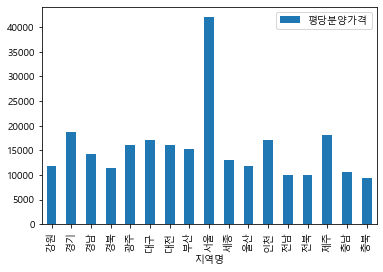

In [9]:
def get_area_type(x):
    x2=x.replace("전용면적", "").replace("초과", "~").replace("이하", "").replace(" ", "")
    return x2

df_last = pd.read_csv("data/전국평균 분양가격 (2015년10월~2019년12월).csv", encoding="cp949")
df_last["분양가격"] = pd.to_numeric(df_last["분양가격(㎡)"], errors='coerce')
df_last["평당분양가격"] = df_last["분양가격"] * 3.3
df_last["전용면적"] = df_last["규모구분"].map(get_area_type)
df_last=df_last.drop(columns=['규모구분','분양가격(㎡)','분양가격'], errors='ignore') # error raise 방지
df_last=df_last.loc[df_last['평당분양가격'].notnull()]
print("## 주어진 데이터")
df_last

## 코드작성
df7=df_last.pivot_table(index='지역명', values='평당분양가격', aggfunc=np.max)
df7.plot.bar()
## 코드작성 끝

print("## 코딩 결과")

# 문제8~9
* dataframe df8에서 "group별" "year별" score의 평균을 아래 그림과 같이 두 axes에 bar plot으로 나타내시오
* 조건1) pandas plot을 사용하여 ax1 axes에 나타내시오
* 조건2) seaborn plot을 사용하여 ax2 axes에 나타내시오 (ci는 default값 사용)

## 주어진 데이터


,year,group,score
0,2021,a,0
1,2022,b,1
2,2023,a,2
3,2021,b,3
4,2022,a,4
...,...,...,...
85,2022,b,85
86,2023,a,86
87,2021,b,87
88,2022,a,88


## 코딩 결과


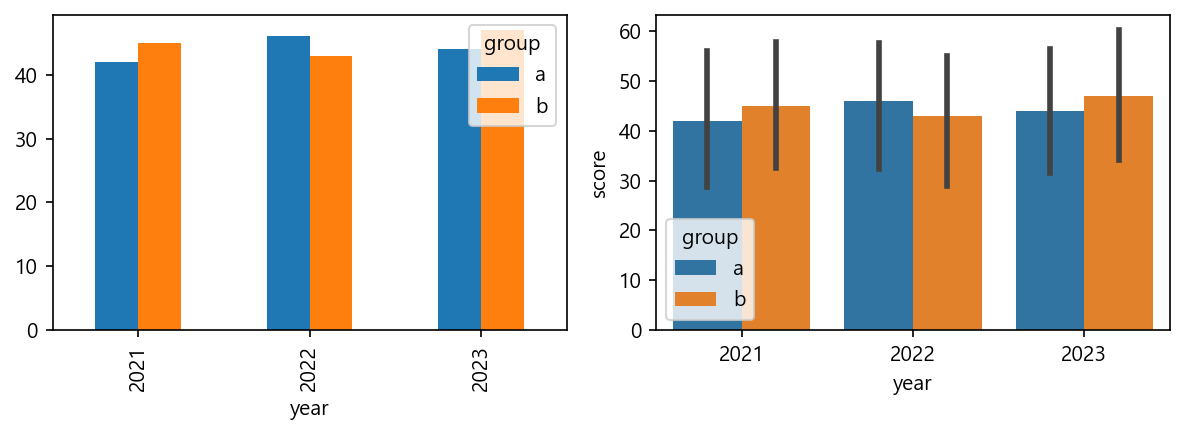

In [10]:
df8=pd.DataFrame({'year':['2021','2022','2023']*30, 'group':['a','b']*45, 'score':np.arange(90)})
print("## 주어진 데이터")
df8

fig=plt.figure(figsize=(8, 3), dpi=150)
ax1, ax2=fig.subplots(1,2)

## 코드작성
df81=df8.pivot_table(index='year', columns='group', values='score')
_=df81.plot.bar(ax=ax1)

_=sns.barplot(data=df8, x='year', y='score', hue='group', ax=ax2)
## 코드작성 끝

fig.tight_layout()
print("## 코딩 결과")


# 문제10
* dataframe df10에서 year 별, group 별 score 값을 아래와 같은 boxplot으로 나타내시오
* 조건1) seaborn plot을 사용하시오
* 조건2) 주어진 ax1에 나타내시오

## 주어진 데이터


,year,group,score
0,2021,a,0
1,2021,a,1
2,2021,a,2
3,2021,a,3
4,2021,a,4
...,...,...,...
295,2023,b,295
296,2023,b,296
297,2023,b,297
298,2023,b,298


<AxesSubplot:xlabel='year', ylabel='score'>

## 코딩 결과


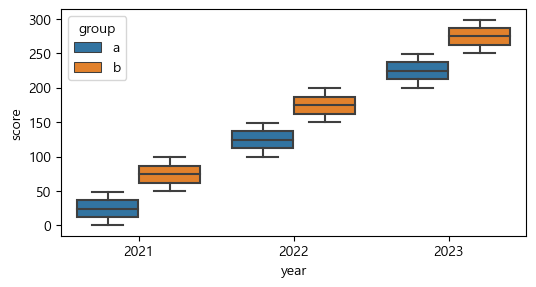

In [11]:
df10=pd.DataFrame({'year':['2021']*100+['2022']*100+['2023']*100, 'group':(['a']*50+['b']*50)*3, 'score':np.arange(300)})
print("## 주어진 데이터")
df10

fig=plt.figure(figsize=(6, 3), dpi=100)
ax1=fig.subplots()

## 코드작성
sns.boxplot(data=df10, x="year", y="score", hue="group", ax=ax1)
## 코드작성 끝

print("## 코딩 결과")

# 문제11
* df11a과 df11b를 'key'로 merge한 df11c를 아래와 같이 출력하시오

In [12]:
df11a = pd.DataFrame({'key': ['a', 'b', 'c', 'd'], 'v1': [1, 2, 3, 4], 'v2': [1, 2, 3, 4]})
df11b = pd.DataFrame({'key': ['e', 'c', 'b', 'a'], 'v3': [4, 3, 2, 1], 'v4': [4, 3, 2, 1]})
print("## 주어진 데이터")
df11a
df11b

## 코드작성
df11c=pd.merge(df11a,df11b, on='key', how='left')
## 코드작성 끝

print("## 코딩 결과")
df11c

## 주어진 데이터


,key,v1,v2
0,a,1,1
1,b,2,2
2,c,3,3
3,d,4,4


,key,v3,v4
0,e,4,4
1,c,3,3
2,b,2,2
3,a,1,1


## 코딩 결과


,key,v1,v2,v3,v4
0,a,1,1,1.0,1.0
1,b,2,2,2.0,2.0
2,c,3,3,3.0,3.0
3,d,4,4,NaN,NaN


# 문제12
* 아래 주어진 세 개의 series c1, c2, c3를 연결하여 100행 3열의 dataframe을 만들고, boxplot을 그리시오
* 주의1) random data를 사용하기때문에 결과 그림이 조금씩은 다를수 있음

## 주어진 데이터


0    49.256833
1    49.917838
2    48.568939
Name: c1, dtype: float64

0    70.968307
1    70.536648
2    70.162095
Name: c2, dtype: float64

0    60.016062
1    59.824385
2    61.044567
Name: c3, dtype: float64

## 코딩 결과


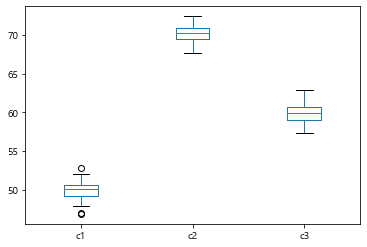

In [13]:
c1=pd.Series(np.random.normal(50,1,size=100), name='c1')
c2=pd.Series(np.random.normal(70,1,size=100), name='c2')
c3=pd.Series(np.random.normal(60,1,size=100), name='c3')
print("## 주어진 데이터")
c1.head(3)
c2.head(3)
c3.head(3)

## 코드작성
df12=pd.concat((c1,c2,c3),axis=1)
_=df12.plot.box()
## 코드작성 끝

print("## 코딩 결과")

# 문제13
* df13의 column a의 네 개의 숫자 중에 세번째 있는 숫자만을 가지고 column b를 만드시오

In [14]:
df13=pd.DataFrame({'a':['1_51_1_2','1_41_10_4','1_31_100_5','1_22_1000_6']})
print("## 주어진 데이터")
df13

 ## 코드작성
df13['b']=df13['a'].str.split('_').str.get(2)
 ## 코드작성 끝
    
print("## 코딩 결과")
df13

## 주어진 데이터


,a
0,1_51_1_2
1,1_41_10_4
2,1_31_100_5
3,1_22_1000_6


## 코딩 결과


,a,b
0,1_51_1_2,1
1,1_41_10_4,10
2,1_31_100_5,100
3,1_22_1000_6,1000


# 문제14
* dataframe df_last에서 "전용면적 별" 평당분양가격의 "최대값"을 아래 그림과 같이 barplot으로 그리시오
* 조건1) seaborn plot을 사용하시오
* 조건2) 최대값이 큰 순서로 전용면적(x축)을 sorting 하시오
* 조건3) 주어진 ax1에 나타내시오
* 조건4) ci는 default 값 사용

## 주어진 데이터


,지역명,연도,월,평당분양가격,전용면적
0,서울,2015,10,19275.3,전체
1,서울,2015,10,18651.6,60㎡
2,서울,2015,10,19410.6,60㎡~85㎡
3,서울,2015,10,18879.3,85㎡~102㎡
4,서울,2015,10,19400.7,102㎡~
...,...,...,...,...,...
4327,경남,2019,12,10114.5,60㎡~85㎡
4328,경남,2019,12,10715.1,85㎡~102㎡
4330,제주,2019,12,12810.6,전체
4332,제주,2019,12,12863.4,60㎡~85㎡


## 코딩 결과


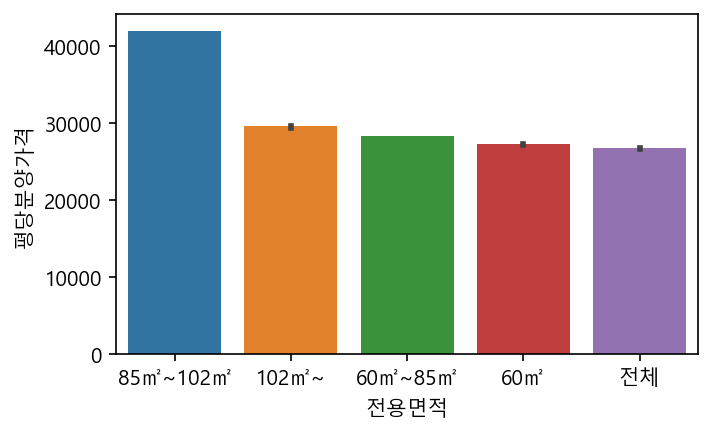

In [15]:
def get_area_type(x):
    x2=x.replace("전용면적", "").replace("초과", "~").replace("이하", "").replace(" ", "")
    return x2

df_last = pd.read_csv("data/전국평균 분양가격 (2015년10월~2019년12월).csv", encoding="cp949")
df_last["분양가격"] = pd.to_numeric(df_last["분양가격(㎡)"], errors='coerce')
df_last["평당분양가격"] = df_last["분양가격"] * 3.3
df_last["전용면적"] = df_last["규모구분"].map(get_area_type)
df_last=df_last.drop(columns=['규모구분','분양가격(㎡)','분양가격'], errors='ignore') # error raise 방지
df_last=df_last.loc[df_last['평당분양가격'].notnull()]
print("## 주어진 데이터")
df_last

fig=plt.figure(figsize=(5, 3), dpi=150)
ax1=fig.subplots()

## 코드작성
max_price = df_last.pivot_table(index="전용면적", values="평당분양가격", aggfunc=np.max)
sorted_price=max_price.sort_values(by="평당분양가격", ascending=False)
_=sns.barplot(data=df_last, x='전용면적', y="평당분양가격", estimator=np.max, order=sorted_price.index, ax=ax1)
 ## 코드작성 끝
    
print("## 코딩 결과")